In [1]:
!pip install numpy==1.15.4

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import sklearn.feature_extraction.text
from nltk.tokenize import TreebankWordTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_hdf('/content/drive/My Drive/Projeto Ana/Análise 2020/tweets_total.hdf', key = 'hdf')

df.shape

(388234, 7)

In [5]:
df = df[(df['date'] > '2013-05-01 00:00:00') & (df['date'] < '2013-07-31 09:00:00')]
df.shape

(21886, 7)

In [0]:
def word_transform(words):
    total = [x.lower() for x in words]
    manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                             'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                             'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','Dilma','pictwittercom','dia','mil','pra',
                             'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
            'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
            'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog']
    stop_words = stopwords.words('portuguese')
    for i in manual_list_stop_words:
        stop_words.append(i)
    
    total = [x for x in total if x not in stop_words]
    total = [re.sub(r'[,\.!?()]', '', x) for x in total]
    total = [x for x in total if not re.search(r"\d", x)]
    
    long_string = (" ").join(total)
    return long_string

In [0]:
df['tweet'] = df['tweet'].apply(lambda x: x.split())
df['tweet'] = df['tweet'].apply(word_transform)

In [0]:
def especial(x):
  array = [i for i in x.split() if 'http' not in i]
  array = [i for i in array if 'dilma' not in i]
  array = [i for i in array if 'pictwittercom' not in i]
  return ' '.join(array)

df['tweet'] = df['tweet'].apply(especial) 

## Frequência

In [0]:
def plot_n_most_common_words(count_data, count_vectorizer, n):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(20, 10/1.6180))
    plt.subplot(title=f'{n} palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('palavras')
    plt.ylabel('quantidade')
    plt.show()

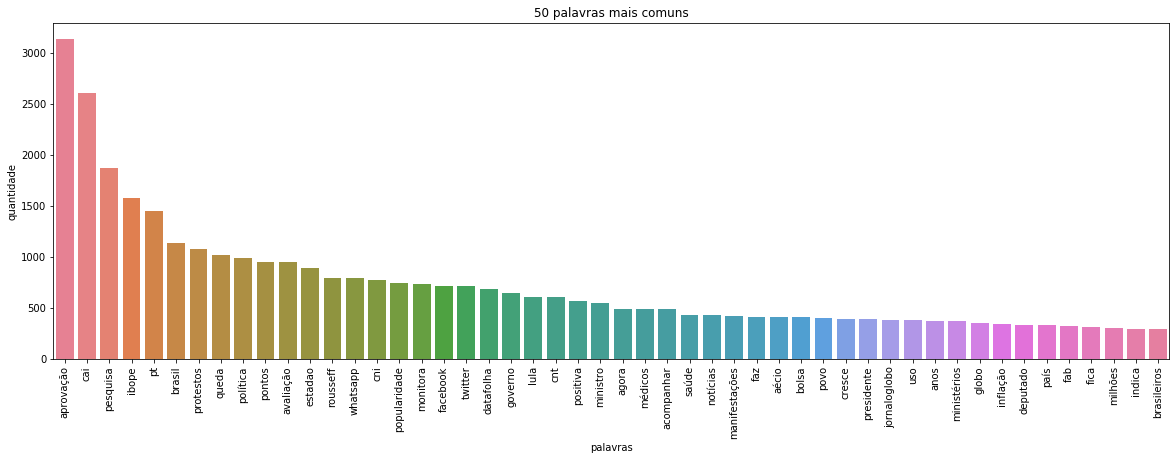

In [0]:
count_vectorizer = CountVectorizer()

count_data = count_vectorizer.fit_transform(df['tweet'])
                                               
plot_n_most_common_words(count_data, count_vectorizer,50) 

## Nuvem de palavras

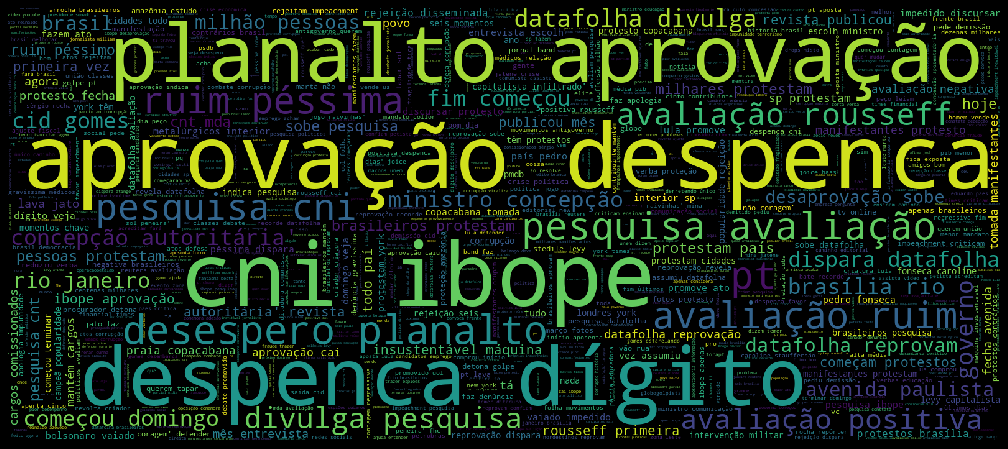

In [0]:
wordcloud_string = ' '.join(df['tweet'].values)

wordcloud = WordCloud(max_words=1000,width=1600, height=700, contour_width=20)
wordcloud.generate(wordcloud_string)
plt.figure( figsize=(18,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('worcloud_Pasztor.png', facecolor='k', bbox_inches='tight')

## LDA

In [0]:
count_vectorizer = CountVectorizer()

count_data = count_vectorizer.fit_transform(df['tweet'])

In [0]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 4
number_words = 6
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
protestam país despenca aprovação brasil planalto

Topic #1:
protesto pt fim manifestantes começou copacabana

Topic #2:
reprovação datafolha impeachment manifestações corrupção governo

Topic #3:
pesquisa avaliação ibope datafolha rousseff cni


In [0]:
%%time
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_setences'+'.html')

CPU times: user 16.1 s, sys: 120 ms, total: 16.2 s
Wall time: 14min 9s


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [0]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.008831  0.146017       1        1  33.482677
0      0.086133  0.087160       2        1  28.096561
3     -0.214395 -0.073257       3        1  26.614996
2      0.137093 -0.159920       4        1  11.805765, topic_info=      Category          Freq         Term         Total  loglift  logprob
12381  Default   1764.000000     pesquisa   1764.000000  30.0000  30.0000
4224   Default   1659.000000    datafolha   1659.000000  29.0000  29.0000
1548   Default   1366.000000    avaliação   1366.000000  28.0000  28.0000
1113   Default   1053.000000    aprovação   1053.000000  27.0000  27.0000
7723   Default  24912.000000      governo  24912.000000  26.0000  26.0000
...        ...           ...          ...           ...      ...      ...
12518   Topic4    143.430201         pior    288.767516   1.4368  -5.3359
8298    Topic4    160.384389  impeachment    512.750715   0.9744  -5.2242
7129    Topic4    157.922136        folha    499.662908   0.9848  -5.2397
13382   Topic4    120.218742           pt   1303.241337  -0.2467  -5.5125
8087    Topic4    109.456126         http   2103.491878  -0.8192  -5.6063

[239 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
254        4  0.997075    acusa
395        1  0.109651   afirma
395        2  0.359791   afirma
395        3  0.013706   afirma
395        4  0.513987   afirma
...      ...       ...      ...
16799      2  0.170948      via
16799      3  0.317762      via
16799      4  0.037542      via
17315      1  0.997926     york
17482      2  0.994931  últimos

[294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

## Frequência Nomes Próprios

In [0]:
df = pd.read_hdf('/content/drive/My Drive/Projeto Ana/Análise 2020/tweets_total.hdf', key = 'hdf')
df = df[(df['date'] > '2013-05-01 00:00:00') & (df['date'] < '2013-07-31 09:00:00')]
df.shape

(21886, 7)

In [0]:
def word_transform_uppercase(words):
    manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                             'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                             'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','Dilma','pictwittercom','dia','mil','pra',
                             'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
            'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
            'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog']
    stop_words = stopwords.words('portuguese')
    for i in manual_list_stop_words:
        stop_words.append(i)
    
    total = [x for x in total if x not in stop_words]
    total = [re.sub(r'[,\.!?()]', '', x) for x in total]
    total = [x for x in total if not re.search(r"\d", x)]
    
    long_string = (" ").join(total)
    return long_string

def especial(x):
  array = [i for i in x.split() if 'http' not in i]
  array = [i for i in array if 'dilma' not in i]
  array = [i for i in array if 'pictwittercom' not in i]
  return ' '.join(array)


df['tweet'] = df['tweet'].apply(lambda x: x.split())
df['tweet'] = df['tweet'].apply(word_transform)
df['tweet'] = df['tweet'].apply(especial) 

In [0]:
df_new = df.copy()

In [0]:
df_new = df_new[['id','tweet']]

In [0]:
a = df_new['tweet'].iloc[11]

In [0]:
import nltk.corpus
nltk.download('mac_morpho')

[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.


True

In [0]:
nltk.corpus.mac_morpho.words()

['Jersei', 'atinge', 'média', 'de', 'Cr$', '1,4', ...]

In [0]:
b = nltk.corpus.mac_morpho.tagged_words()

In [0]:
len(b)

1170095